In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

# Sostituisci "path_al_file" con il percorso esatto nel tuo Google Drive
df = pd.read_csv('/content/drive/MyDrive/rangedata_commodities_since1877.csv')


In [4]:
df_corn = df[['Date', 'Range_C_F1', 'Range_C_F2']]

In [5]:
df_corn['Date'] = pd.to_datetime(df_corn['Date'], format='%d-%m-%Y')
df_corn_filtered = df_corn[df_corn['Date'] > '1992-01-01']

<ipython-input-5-e2ec65c8ec2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corn['Date'] = pd.to_datetime(df_corn['Date'], format='%d-%m-%Y')


In [6]:
df_corn_filtered

,Date,Range_C_F1,Range_C_F2
32855,1992-01-02,0.006969,0.007782
32856,1992-01-03,0.009014,0.008811
32857,1992-01-06,0.012024,0.010769
32858,1992-01-07,0.005008,0.004885
32859,1992-01-08,0.013917,0.013566
...,...,...,...
39632,2017-12-25,0.005690,0.005559
39633,2017-12-26,0.006390,0.006244
39634,2017-12-27,0.007082,0.007610
39635,2017-12-28,0.009950,0.009716


In [7]:
df_corn_filtered['Volatility_Difference'] = df_corn_filtered['Range_C_F1'] - df_corn_filtered['Range_C_F2']
df_corn_filtered[['Date', 'Range_C_F1', 'Range_C_F2', 'Volatility_Difference']].head()

<ipython-input-7-eac7559cbec2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corn_filtered['Volatility_Difference'] = df_corn_filtered['Range_C_F1'] - df_corn_filtered['Range_C_F2']


,Date,Range_C_F1,Range_C_F2,Volatility_Difference
32855,1992-01-02,0.006969,0.007782,-0.000813
32856,1992-01-03,0.009014,0.008811,0.000203
32857,1992-01-06,0.012024,0.010769,0.001256
32858,1992-01-07,0.005008,0.004885,0.000122
32859,1992-01-08,0.013917,0.013566,0.000351


<ipython-input-8-ee675a5a7ea8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corn_filtered['Range_C_F1_MA30'] = df_corn_filtered['Range_C_F1'].rolling(window=30).mean()
<ipython-input-8-ee675a5a7ea8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corn_filtered['Range_C_F2_MA30'] = df_corn_filtered['Range_C_F2'].rolling(window=30).mean()
<ipython-input-8-ee675a5a7ea8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

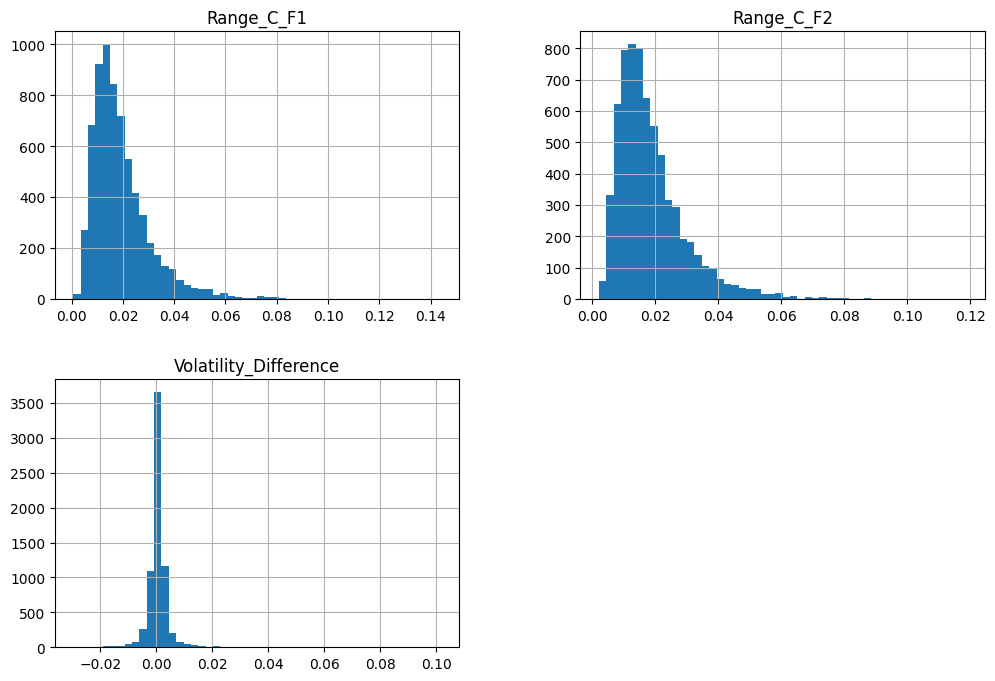

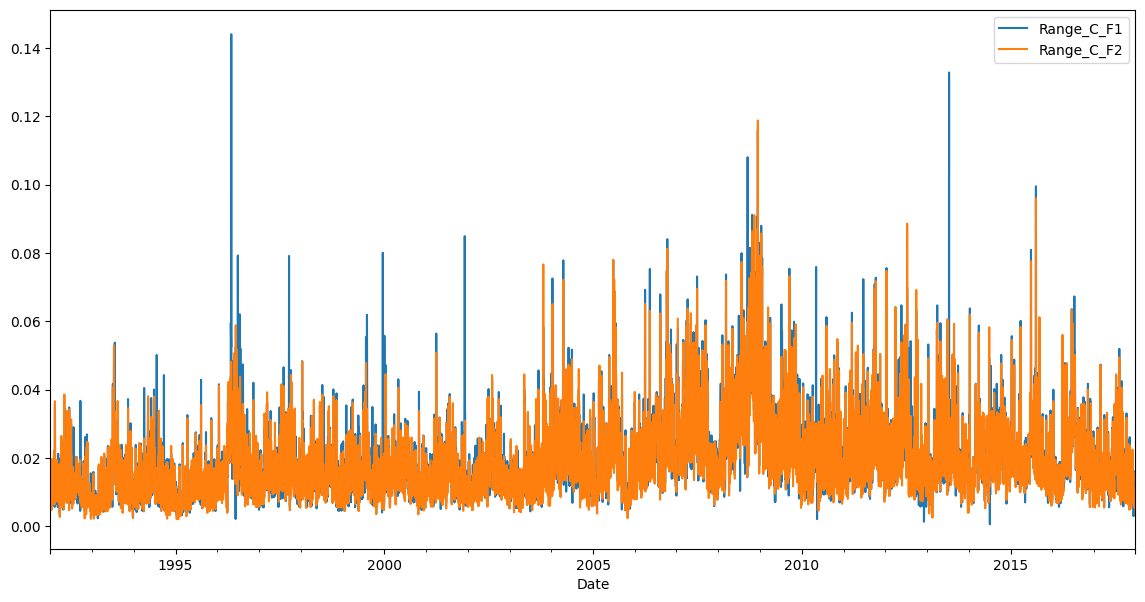

In [8]:
if 'Date' not in df_corn_filtered.columns:
    df_corn_filtered = df_corn_filtered.reset_index()

df_corn_filtered[['Range_C_F1', 'Range_C_F2', 'Volatility_Difference']].describe()

df_corn_filtered[['Range_C_F1', 'Range_C_F2', 'Volatility_Difference']].hist(bins=50, figsize=(12, 8))

df_corn_filtered.plot(x='Date', y=['Range_C_F1', 'Range_C_F2'], figsize=(14, 7))

df_corn_filtered['Range_C_F1_MA30'] = df_corn_filtered['Range_C_F1'].rolling(window=30).mean()
df_corn_filtered['Range_C_F2_MA30'] = df_corn_filtered['Range_C_F2'].rolling(window=30).mean()
df_corn_filtered['Volatility_Difference_MA30'] = df_corn_filtered['Volatility_Difference'].rolling(window=30).mean()

correlation = df_corn_filtered[['Range_C_F1', 'Range_C_F2']].corr()

df_corn_filtered['Year'] = df_corn_filtered['Date'].dt.year
df_corn_filtered['Month'] = df_corn_filtered['Date'].dt.month
monthly_avg = df_corn_filtered.groupby(['Year', 'Month'])[['Range_C_F1', 'Range_C_F2', 'Volatility_Difference']].mean()

q1 = df_corn_filtered['Volatility_Difference'].quantile(0.25)
q3 = df_corn_filtered['Volatility_Difference'].quantile(0.75)
iqr = q3 - q1
outliers = df_corn_filtered[(df_corn_filtered['Volatility_Difference'] < (q1 - 1.5 * iqr)) | (df_corn_filtered['Volatility_Difference'] > (q3 + 1.5 * iqr))]



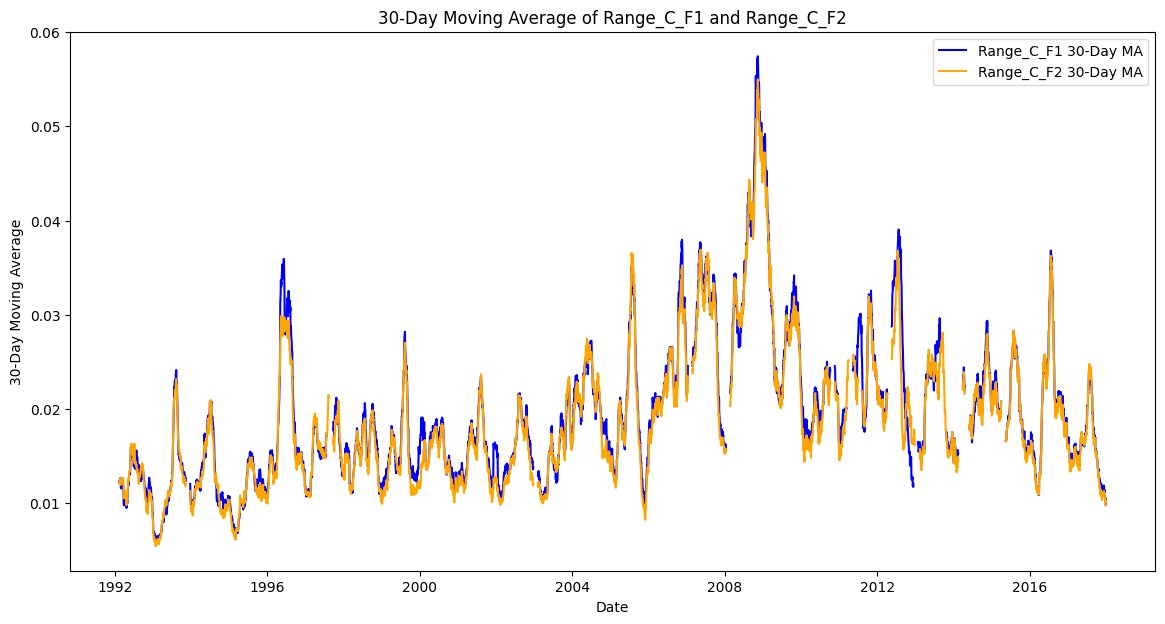

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df_corn_filtered['Date'], df_corn_filtered['Range_C_F1_MA30'], label='Range_C_F1 30-Day MA', color='blue')
plt.plot(df_corn_filtered['Date'], df_corn_filtered['Range_C_F2_MA30'], label='Range_C_F2 30-Day MA', color='orange')
plt.xlabel('Date')
plt.ylabel('30-Day Moving Average')
plt.title('30-Day Moving Average of Range_C_F1 and Range_C_F2')
plt.legend()
plt.show()

In [12]:
correlation

,Range_C_F1,Range_C_F2
Range_C_F1,1.000000,0.926007
Range_C_F2,0.926007,1.000000


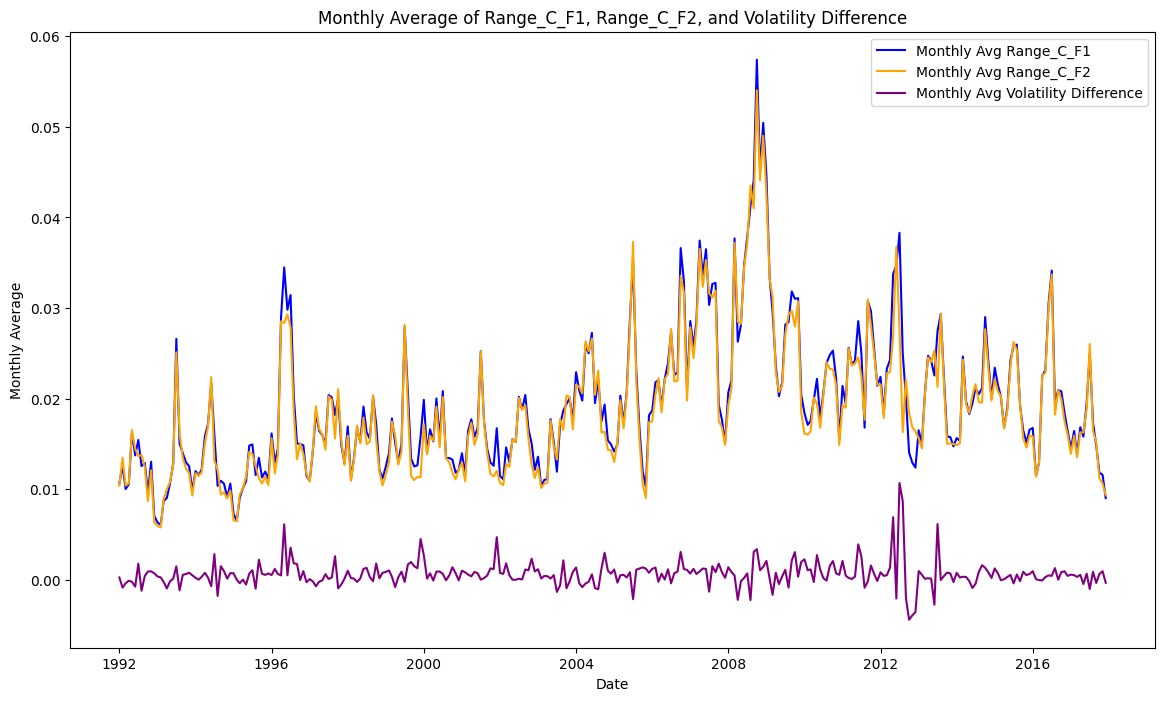

In [13]:
monthly_avg.index = pd.to_datetime(monthly_avg.index.map(lambda x: f"{x[0]}-{x[1]}-01"))
plt.figure(figsize=(14, 8))
plt.plot(monthly_avg.index, monthly_avg['Range_C_F1'], label='Monthly Avg Range_C_F1', color='blue')
plt.plot(monthly_avg.index, monthly_avg['Range_C_F2'], label='Monthly Avg Range_C_F2', color='orange')
plt.plot(monthly_avg.index, monthly_avg['Volatility_Difference'], label='Monthly Avg Volatility Difference', color='purple')
plt.xlabel('Date')
plt.ylabel('Monthly Average')
plt.title('Monthly Average of Range_C_F1, Range_C_F2, and Volatility Difference')
plt.legend()
plt.show()

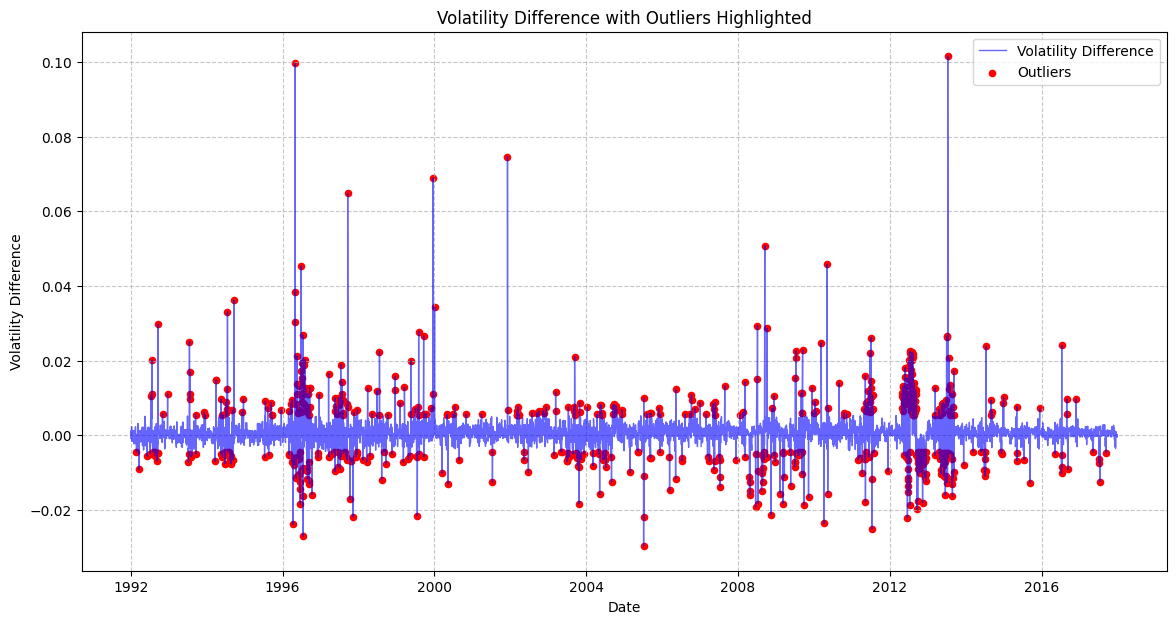

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(df_corn_filtered['Date'], df_corn_filtered['Volatility_Difference'], label='Volatility Difference', color='blue', alpha=0.6, linewidth=1)
plt.scatter(outliers['Date'], outliers['Volatility_Difference'], color='red', label='Outliers', s=20)
plt.xlabel('Date')
plt.ylabel('Volatility Difference')
plt.title('Volatility Difference with Outliers Highlighted')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<ipython-input-23-330280698dfa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Year'] = outliers['Date'].dt.year
<ipython-input-23-330280698dfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Month'] = outliers['Date'].dt.month


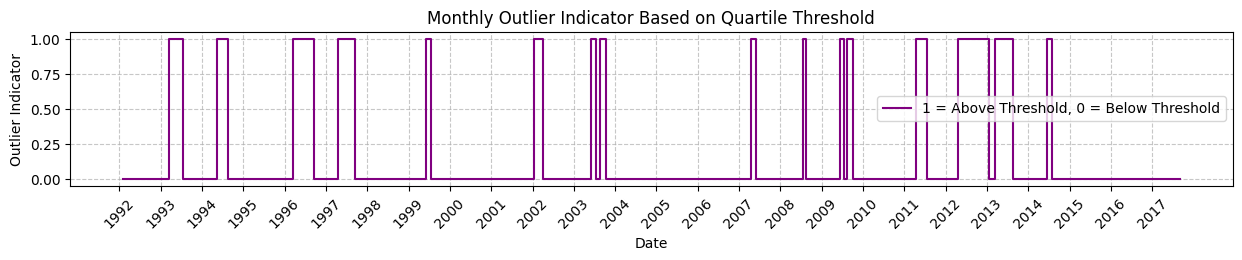

In [23]:
outliers['Year'] = outliers['Date'].dt.year
outliers['Month'] = outliers['Date'].dt.month


monthly_outlier_count = outliers.groupby(['Year', 'Month']).size()
outlier_threshold = monthly_outlier_count.quantile(0.75)

monthly_outlier_indicator = (monthly_outlier_count > outlier_threshold).astype(int)

monthly_outlier_indicator.index = pd.to_datetime(monthly_outlier_indicator.index.map(lambda x: f"{x[0]}-{x[1]}-01"))

plt.figure(figsize=(15, 2))
plt.step(monthly_outlier_indicator.index, monthly_outlier_indicator, where='mid', color='purple', label='1 = Above Threshold, 0 = Below Threshold')
plt.xlabel('Date')
plt.ylabel('Outlier Indicator')
plt.title('Monthly Outlier Indicator Based on Quartile Threshold')

plt.legend()

years = pd.date_range(start="1992-01-01", end=monthly_outlier_indicator.index.max(), freq='YS')
plt.xticks(years, [year.year for year in years], rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

